# Python Results Analysis

In [1]:
import pandas as pd

results = pd.read_csv('form-responses.csv')
results.head()

,Timestamp,How would you rate the tests in terms of Complexity? [Andela D2 Java test I (Pilot)],How would you rate the tests in terms of Complexity? [Andela D2 Java test II (Pilot)],How would you rate the tests in terms of Complexity? [Andela D2 Java test III (Pilot)],How would you rate the tests in terms of Complexity? [Andela D2 Java test IV (Pilot)],How would you rate the tests in terms of Complexity? [Andela D2 Java test V (Pilot)],How would you rate the tests in terms of Complexity? [Andela D3+ Java test I (Pilot)],How would you rate the tests in terms of Complexity? [Andela D3+ Java test II (Pilot)],How would you rate the tests in terms of Complexity? [Andela D2 Ruby on Rails Test I (Pilot)],How would you rate the tests in terms of Complexity? [Andela D3+ Ruby on Rails Test I (Pilot)],...,What level is the test most suitable for? [Andela D2 NodeJS Test II (Pilot)],What level is the test most suitable for? [Andela D2 NodeJS Test III (Pilot)],What level is the test most suitable for? [Andela D2 NodeJs Test IV (Pilot)],What level is the test most suitable for? [Andela D3+ NodeJs Test I (Pilot)],What level is the test most suitable for? [Andela D3+ NodeJS Test II (Pilot)],What level is the test most suitable for? [Andela D2 IOS Test I (Pilot)],What level is the test most suitable for? [Andela D3+ iOS Test I (Pilot)],What level is the test most suitable for? [Andela D3+ iOS test II (Pilot)],What level is the test most suitable for? [Andela D3+ iOS Test III (Pilot)],What other suggestions/recommendations would you give?
0,6/27/2019 10:56:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The structuring of the coding challenge especi...
1,6/27/2019 12:21:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,the first question has alot of error of the ha...
2,6/27/2019 12:22:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"I did not write the angular test, so I have no..."
3,6/27/2019 17:16:45,NaN,NaN,Medium,Medium,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Andela D2 Java test IV --> the problem of ""Pre..."
4,6/28/2019 7:48:15,NaN,Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The code challenges are pretty straightforward...


## How would you rate the tests in terms of Complexity? 

In [2]:
# results.columns

In [23]:
# return true or false depending on whether a column name matches
def filterCol(name):
    return name.startswith('How would you rate the tests in terms of Complexity?') and name.find('Python') != -1

filter_criteria = list(map(filterCol ,results.columns))
# print(filter_criteria)

# credits for this hack to show columns according to the boolean criteria
# https://stackoverflow.com/a/48497863/315385
complexity = results.loc[:, filter_criteria]
# remove entries without any data
complexity = complexity.dropna(how='all')
# replace NaN values to allow counter to work as expected
complexity = complexity.fillna('missing')
complexity

,How would you rate the tests in terms of Complexity? [Andela D2 Python Test I (Pilot)],How would you rate the tests in terms of Complexity? [Andela D2 Python Test II (Pilot)],How would you rate the tests in terms of Complexity? [Andela D2 Python Test III (Pilot)],How would you rate the tests in terms of Complexity? [Andela D3+ Python Test I (Pilot)],How would you rate the tests in terms of Complexity? [Andela D3+ Python Test II (Pilot)],How would you rate the tests in terms of Complexity? [Andela D3+ Python Test III (Pilot)]
21,missing,missing,missing,Difficult,Difficult,Difficult
25,Medium,Medium,missing,missing,missing,missing
33,missing,missing,missing,missing,Medium,Medium
42,missing,missing,missing,Medium,missing,missing


In [10]:
list(complexity)[0]

'How would you rate the tests in terms of Complexity? [Andela D2 Python Test I (Pilot)]'

In [24]:
from collections import Counter
complexity_counts = pd.DataFrame()

for col in list(complexity):
    mead_counter = Counter({'Easy': 0, 'Medium':0, 'Difficult':0})
    mead_counter.update(complexity[col]);
    print(mead_counter)
    complexity_counts[col] = mead_counter.values()

complexity_counts    

Counter({'missing': 3, 'Medium': 1, 'Easy': 0, 'Difficult': 0})
Counter({'missing': 3, 'Medium': 1, 'Easy': 0, 'Difficult': 0})
Counter({'missing': 4, 'Easy': 0, 'Medium': 0, 'Difficult': 0})
Counter({'missing': 2, 'Medium': 1, 'Difficult': 1, 'Easy': 0})
Counter({'missing': 2, 'Medium': 1, 'Difficult': 1, 'Easy': 0})
Counter({'missing': 2, 'Medium': 1, 'Difficult': 1, 'Easy': 0})


,How would you rate the tests in terms of Complexity? [Andela D2 Python Test I (Pilot)],How would you rate the tests in terms of Complexity? [Andela D2 Python Test II (Pilot)],How would you rate the tests in terms of Complexity? [Andela D2 Python Test III (Pilot)],How would you rate the tests in terms of Complexity? [Andela D3+ Python Test I (Pilot)],How would you rate the tests in terms of Complexity? [Andela D3+ Python Test II (Pilot)],How would you rate the tests in terms of Complexity? [Andela D3+ Python Test III (Pilot)]
0,0,0,0,0,0,0
1,1,1,0,1,1,1
2,0,0,0,1,1,1
3,3,3,4,2,2,2


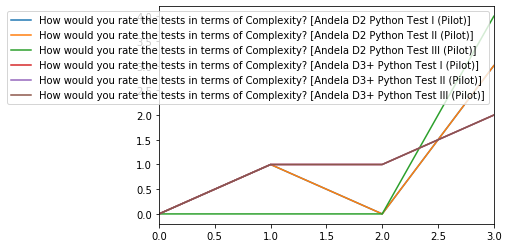

In [25]:
import matplotlib.pyplot as plt
plt.close('all')

#complexity
complexity_counts.plot()